In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose


In [7]:
from sklearn.metrics  import mean_absolute_percentage_error,mean_squared_error, r2_score

In [8]:
import scipy.stats  as stats

In [9]:
df=pd.read_csv('RestaurantVisitors.csv',index_col='date',parse_dates=True)

In [10]:
df

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0
...,...,...,...,...,...,...,...,...
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN


In [11]:
df.index.freq='D'

In [12]:
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [13]:
df1=df.dropna()
df1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 478 entries, 2016-01-01 to 2017-04-22
Freq: D
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weekday       478 non-null    object 
 1   holiday       478 non-null    int64  
 2   holiday_name  478 non-null    object 
 3   rest1         478 non-null    float64
 4   rest2         478 non-null    float64
 5   rest3         478 non-null    float64
 6   rest4         478 non-null    float64
 7   total         478 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 33.6+ KB


In [17]:
cols=['rest1','rest2','rest3','rest4','total']
for col in cols:
    df1[col]=df1[col].astype(int)

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 478 entries, 2016-01-01 to 2017-04-22
Freq: D
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   weekday       478 non-null    object
 1   holiday       478 non-null    int64 
 2   holiday_name  478 non-null    object
 3   rest1         478 non-null    int64 
 4   rest2         478 non-null    int64 
 5   rest3         478 non-null    int64 
 6   rest4         478 non-null    int64 
 7   total         478 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 33.6+ KB


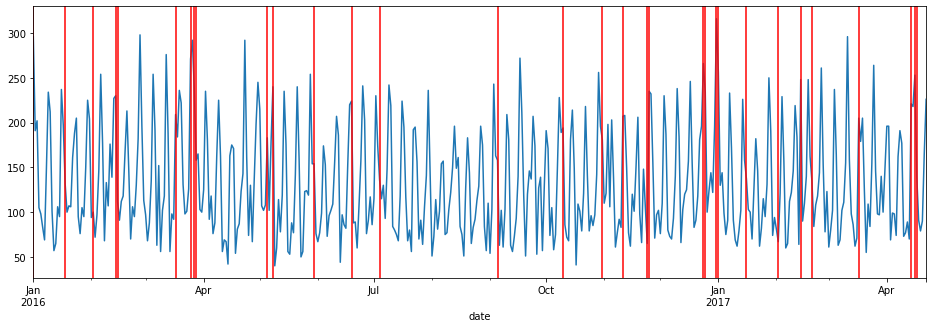

In [19]:
ax=df1['total'].plot(figsize=(16,5))
for x in df1.query('holiday==1').index:
    ax.axvline(x=x,color='r')

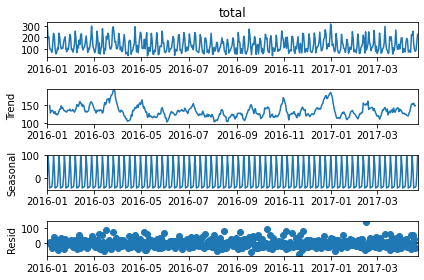

In [20]:
result=seasonal_decompose(df1['total'])
result.plot();

In [21]:
auto_arima(df1['total'],seasonal=True,m=7,trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=5269.484, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=4916.749, Time=0.34 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=5049.644, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=6126.084, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=5200.790, Time=0.06 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=4845.442, Time=0.89 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=inf, Time=1.14 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=4816.600, Time=0.53 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=5058.642, Time=0.25 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=4951.803, Time=0.97 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=4982.776, Time=0.45 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=1.24 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=4770.490, Time=0.49 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=5093.1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2381.245
Date:                   Tue, 26 Apr 2022   AIC                           4770.490
Time:                           06:55:33   BIC                           4787.169
Sample:                                0   HQIC                          4777.048
                                   - 478                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.0723      1.600      2.545      0.011       0.936       7.209
ar.S.L7        0.9680      0.012     81.909      0.000       0.945       0.991
ma.S.L7       -0.7313      0.051    -14.451      0.000      -0.830      -0.632
sigma2      1248.4033     75.522     16.530      0.000    1100.384    1396.423
===================================================================================
Ljung-Box (L1) (Q):                  14.32   Jarque-Bera (JB):                59.98
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.71
Prob(H) (two-sided):                  0.38   Kurtosis:                         4.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
train=df1.iloc[:436]
test=df1.iloc[436:]
len(test)

42

In [23]:
model=SARIMAX(train['total'],order=(0,0,0),seasonal_order=(1,0,1,7)).fit()
model.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.01719D+00    |proj g|=  8.65114D-02

At iterate    5    f=  4.98913D+00    |proj g|=  3.10711D-02

At iterate   10    f=  4.97484D+00    |proj g|=  1.66063D-02

At iterate   15    f=  4.96669D+00    |proj g|=  5.66525D-04

At iterate   20    f=  4.96644D+00    |proj g|=  2.66764D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     24      1     0     0   2.668D-06   4.966D+00
  F =   4.9664421023955105     

CONVERG

 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                     total   No. Observations:                  436
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2165.369
Date:                   Tue, 26 Apr 2022   AIC                           4336.738
Time:                           06:55:45   BIC                           4348.970
Sample:                       01-01-2016   HQIC                          4341.565
                            - 03-11-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7        0.9999   9.58e-05   1.04e+04      0.000       1.000       1.000
ma.S.L7       -0.9383      0.024    -39.198      0.000      -0.985      -0.891
sigma2      1111.8065     58.739     18.928      0.000     996.680    1226.932
===================================================================================
Ljung-Box (L1) (Q):                  15.40   Jarque-Bera (JB):                83.56
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.72
Prob(H) (two-sided):                  0.81   Kurtosis:                         4.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

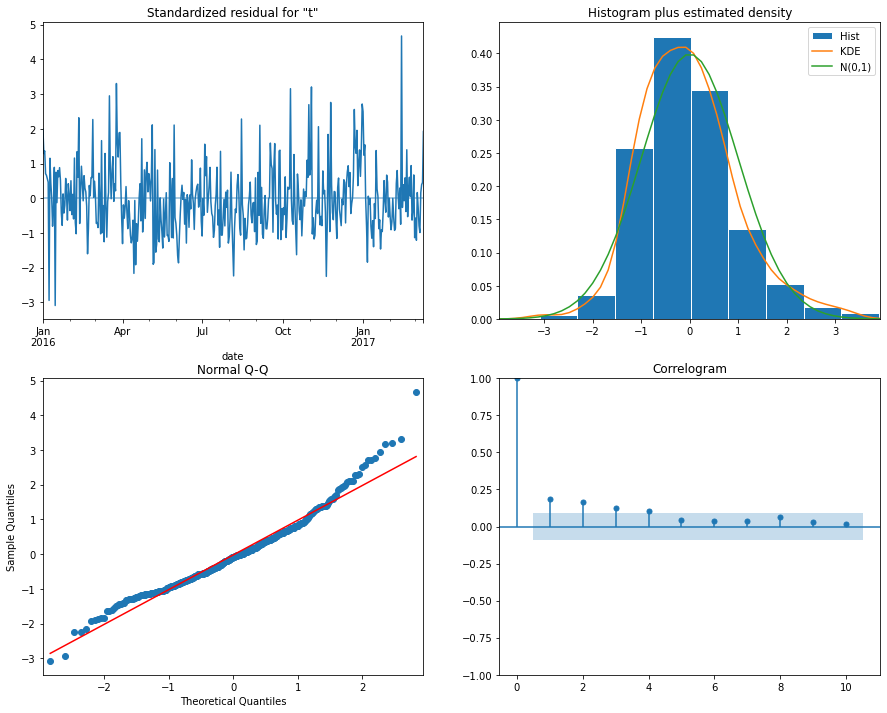

In [24]:
model.plot_diagnostics(figsize=(15,12));

In [25]:
start=len(train)
end=start+len(test)-1
predictions=model.predict(start=start,end=end,dynamic=False).rename('SARIMA')

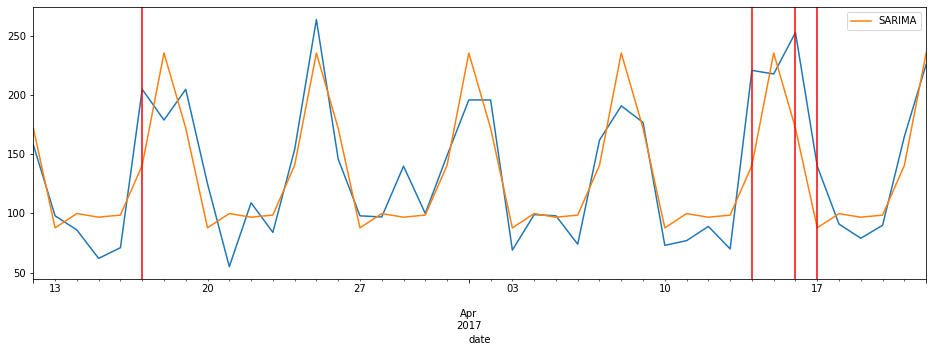

In [26]:
ax=test['total'].plot(figsize=(16,5))
predictions.plot(legend=True)
for x in test.query('holiday==1').index:
    ax.axvline(x=x,color='r')

In [28]:
mean_absolute_percentage_error(test['total'],predictions)

0.20157016526303326

In [29]:
modelExog=SARIMAX(train['total'],exog=train['holiday'],order=(0,0,0),seasonal_order=(1,0,1,7)).fit()
modelExog.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.24304D+00    |proj g|=  7.49269D-02

At iterate    5    f=  5.09816D+00    |proj g|=  9.66459D-03

At iterate   10    f=  4.81986D+00    |proj g|=  1.11454D-02

At iterate   15    f=  4.81298D+00    |proj g|=  2.51383D-04

At iterate   20    f=  4.81287D+00    |proj g|=  8.62111D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     27      1     0     0   4.105D-06   4.813D+00
  F =   4.8128709766911708     

CONVERG

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                     total   No. Observations:                  436
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2098.412
Date:                   Tue, 26 Apr 2022   AIC                           4204.823
Time:                           06:56:42   BIC                           4221.134
Sample:                       01-01-2016   HQIC                          4211.260
                            - 03-11-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       69.6423      3.968     17.550      0.000      61.865      77.420
ar.S.L7        0.9999   7.57e-05   1.32e+04      0.000       1.000       1.000
ma.S.L7       -0.9429      0.023    -40.396      0.000      -0.989      -0.897
sigma2       813.5453     47.380     17.171      0.000     720.681     906.409
===================================================================================
Ljung-Box (L1) (Q):                  15.58   Jarque-Bera (JB):                20.71
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.23
Prob(H) (two-sided):                  1.00   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
predictionsExog=modelExog.predict(start=start,end=end,exog=test['holiday'],dynamic=False).rename('SARIMAX')


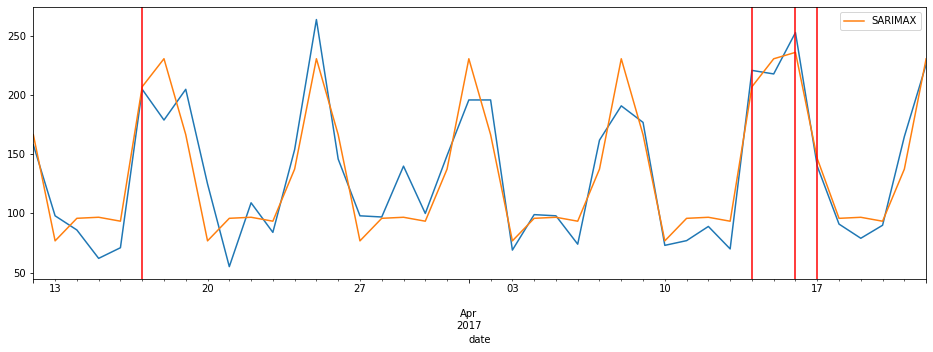

In [31]:
ax=test['total'].plot(figsize=(16,5))
predictionsExog.plot(legend=True)
for x in test.query('holiday==1').index:
    ax.axvline(x=x,color='r')

In [32]:
mean_absolute_percentage_error(test['total'],predictionsExog)

0.16142983735081276

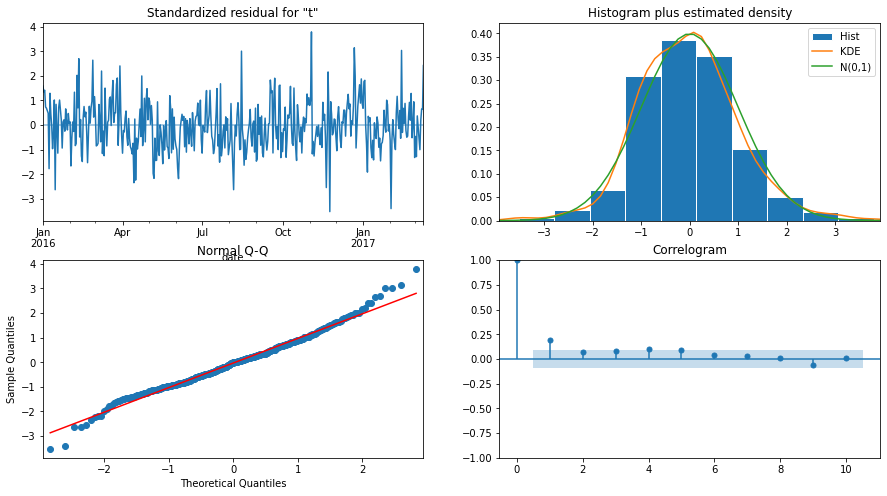

In [33]:
modelExog.plot_diagnostics(figsize=(15,8));